# Classification with BP - bank

## TenserFlow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import KFold
import tensorflow.keras as kr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bank-additional.csv to bank-additional.csv


In [4]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "bank-additional.csv" with length 583898 bytes


In [5]:
filename1 = 'bank-additional.csv'
bank_additional = pd.read_csv(filename1, delimiter=';', header=0)

bank_df = pd.DataFrame(bank_additional)
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [6]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [7]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [8]:
# Explore the prediction target
bank_df['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

<a id="cv"></a>
## Cross validation (using Keras)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/1000
78/78 [==============================] - 1s 2ms/step - loss: 0.2251 - acc: 0.7094
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1653 - acc: 0.8843
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1305 - acc: 0.8883
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1139 - acc: 0.8883
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1057 - acc: 0.8883
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1006 - acc: 0.8883
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0966 - acc: 0.8883
Epoch 8/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0933 - acc: 0.8883
Epoch 9/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0902 - acc: 0.8883
Epoch 10/1000
78/78 [===========================

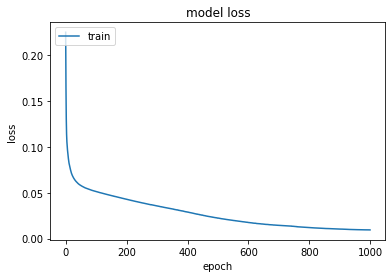

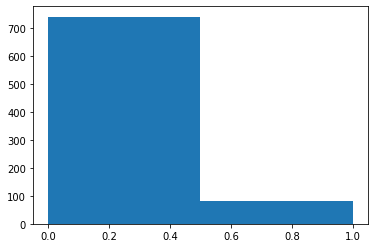

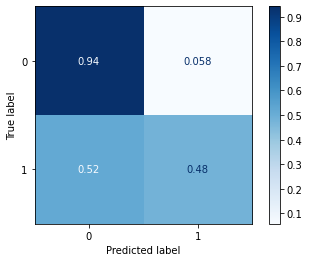

Confusion matrix:
 [[698  43]
 [ 43  40]]
Percentage classification error obtained from validation set: 10.436893203883495%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/1000
78/78 [==============================] - 1s 2ms/step - loss: 0.1571 - acc: 0.8919
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1250 - acc: 0.8919
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1095 - acc: 0.8919
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1012 - acc: 0.8919
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0956 - acc: 0.8919
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0912 - acc: 0.8919
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0874 - acc: 0.8919
Epoch 8/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0842 - acc: 0.8919
Epoch 9/1000
78/78 

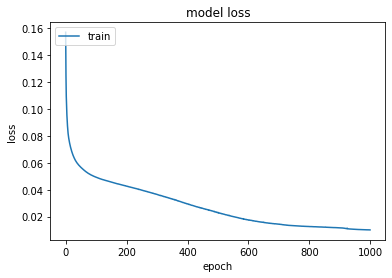

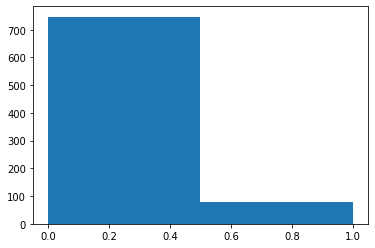

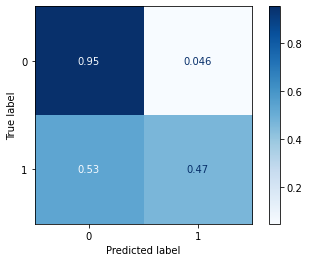

Confusion matrix:
 [[698  34]
 [ 49  43]]
Percentage classification error obtained from validation set: 10.072815533980583%
------------------------------------------------------------------------
Training for fold 3 ...
Epoch 1/1000
78/78 [==============================] - 1s 2ms/step - loss: 0.2714 - acc: 0.4970
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1902 - acc: 0.8673
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1552 - acc: 0.8907
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1306 - acc: 0.8915
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1138 - acc: 0.8915
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1029 - acc: 0.8915
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0957 - acc: 0.8915
Epoch 8/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0907 - acc: 0.8924
Epoch 9/1000
78/78 

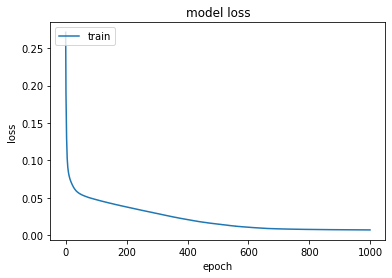

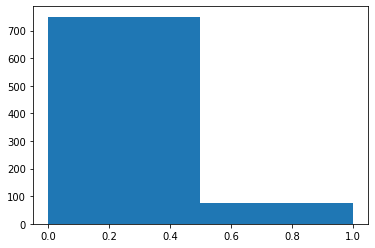

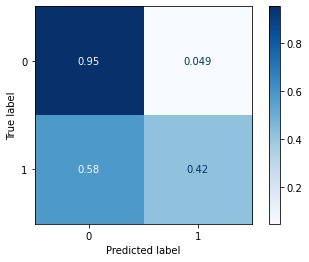

Confusion matrix:
 [[697  36]
 [ 53  38]]
Percentage classification error obtained from validation set: 10.800970873786406%
------------------------------------------------------------------------
Training for fold 4 ...
Epoch 1/1000
78/78 [==============================] - 1s 2ms/step - loss: 0.2076 - acc: 0.8127
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1420 - acc: 0.8916
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1135 - acc: 0.8924
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.1013 - acc: 0.8924
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0945 - acc: 0.8924
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0896 - acc: 0.8924
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0859 - acc: 0.8924
Epoch 8/1000
78/78 [==============================] - 0s 2ms/step - loss: 0.0832 - acc: 0.8924
Epoch 9/1000
78/78 

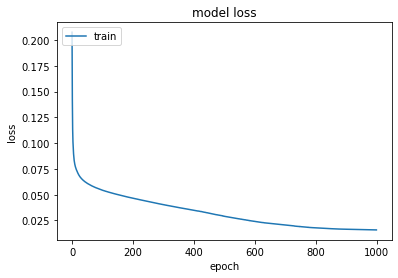

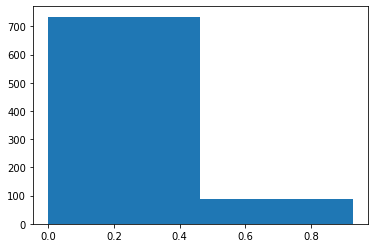

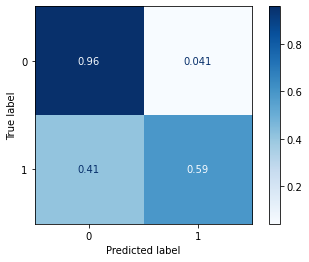

Confusion matrix:
 [[700  30]
 [ 38  55]]
Percentage classification error obtained from validation set: 8.262454434993925%

Results of cross validation:
------------------------------------------------------------------------
Percentage classification error obtained from validation set per fold
------------------------------------------------------------------------
> Fold 1 - 10.436893203883495%
------------------------------------------------------------------------
> Fold 2 - 10.072815533980583%
------------------------------------------------------------------------
> Fold 3 - 10.800970873786406%
------------------------------------------------------------------------
> Fold 4 - 8.262454434993925%
------------------------------------------------------------------------
Mean percentage classification error obtained from cross validation:
> 9.893283511661103% (+- 0.9761202627214226)
------------------------------------------------------------------------


In [13]:
learning_rate = 0.01  # learning rate
momentum = 0.05       # momentum
nn = [20, 100, 25, 5, 1]  # number of neurons for each layer

fold_no = 1

cv_percentage_classification_errors = list()

# 4-fold cross-validation
kf = KFold(n_splits=4, shuffle=True)
for train, validation in kf.split(X_train):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    model = kr.Sequential()

    l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))
    l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))
    l3 = model.add(kr.layers.Dense(nn[3], activation='relu'))
    l4 = model.add(kr.layers.Dense(nn[4], activation='sigmoid'))

    model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

    history = model.fit(X_train[train], y_train[train], epochs=1000)

    plt.plot(history.history['loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train'], loc='upper left')
    plt.show()

    # Generate predictions
    y_pred = model.predict(X_train[validation])
    #print(y_train[validation], y_pred)
    plt.hist(y_pred, bins=2)

    # Use a threshold to select the probabilities that will determine class 0 or 1
    threshold = 0.5
    y_pred = np.where(y_pred > threshold, 1,0)

    # Evaluate by means of a confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_train[validation], y_pred,
                                                    cmap=plt.cm.Blues,
                                                    normalize='true')
    plt.show()

    cm = confusion_matrix(y_train[validation], y_pred)
    print('Confusion matrix:\n', cm)

    # Calculate the percentage classification error obtained from validation test
    percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
    print(f'Percentage classification error obtained from validation set: {percentage_classification_error}%')
    
    cv_percentage_classification_errors.append(percentage_classification_error)

    # Increase fold number
    fold_no = fold_no + 1

print('\nResults of cross validation:')
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Percentage classification error obtained from validation set per fold')
for i in range(0, len(cv_percentage_classification_errors)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - {cv_percentage_classification_errors[i]}%')
print('------------------------------------------------------------------------')
# Calculate the mean percentage classification error obtained from cross-validation
print('Mean percentage classification error obtained from cross validation:')
print(f'> {np.mean(cv_percentage_classification_errors)}% (+- {np.std(cv_percentage_classification_errors)})')
print('------------------------------------------------------------------------')

<a id="training"></a>
## Training (using Keras)

Epoch 1/1000
103/103 [==============================] - 1s 2ms/step - loss: 0.1641 - acc: 0.8901
Epoch 2/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.1160 - acc: 0.8910
Epoch 3/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.0990 - acc: 0.8910
Epoch 4/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.0925 - acc: 0.8910
Epoch 5/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.0890 - acc: 0.8910
Epoch 6/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.0866 - acc: 0.8910
Epoch 7/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.0846 - acc: 0.8910
Epoch 8/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.0828 - acc: 0.8910
Epoch 9/1000
103/103 [==============================] - 0s 2ms/step - loss: 0.0811 - acc: 0.8910
Epoch 10/1000
103/103 [==============================] - 0s 1ms/step - loss: 0.0795 - acc: 0.8910
Epoch 11/1000
103/103 [======

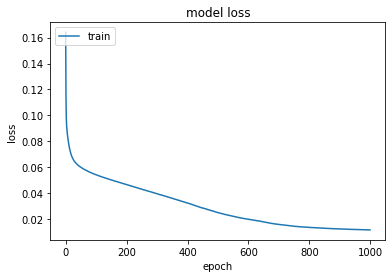

In [14]:
learning_rate = 0.01  # learning rate
momentum = 0.05       # momentum
nn = [20, 100, 25, 5, 1]  # number of neurons for each layer

model = kr.Sequential()

l1 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l2 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[3], activation='relu'))
l4 = model.add(kr.layers.Dense(nn[4], activation='sigmoid'))

model.compile(loss='mse', optimizer=kr.optimizers.SGD(learning_rate=learning_rate, momentum=momentum), metrics=['acc'])

history = model.fit(X_train, y_train, epochs=1000)

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

<a id="test"></a>
## Test (using Keras)

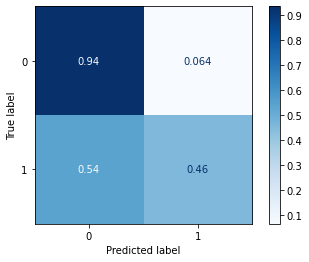

Confusion matrix:
 [[685  47]
 [ 50  42]]
Percentage classification error obtained from test set: 11.771844660194175%


In [15]:
# Generate predictions
y_pred = model.predict(X_test)

threshold = 0.5
y_pred = np.where(y_pred > threshold, 1,0)

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
																								cmap=plt.cm.Blues,
																								normalize='true')
plt.show()

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

percentage_classification_error = 100 * ((cm[0][1] + cm[1][0]) / (cm[0][0] + cm[1][1] + cm[0][1] + cm[1][0]))
print(f'Percentage classification error obtained from test set: {percentage_classification_error}%')

In [34]:
y_pred = np.concatenate(y_pred, axis=0)

bank_bp_results = { 'real_value': y_test,
                    'prediction': y_pred}
  
df = pd.DataFrame(bank_bp_results)

df.to_csv('bank_bp_results.csv')

In [35]:
weights = model.get_weights()
np.savetxt('bank_bp_model_weights.csv', weights, fmt='%s', delimiter=',')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [36]:
# serialize model to JSON
model_json = model.to_json()
with open("bank_bp_model.json", "w") as json_file:
    json_file.write(model_json)